In [ ]:
import femm
import numpy as np
import matplotlib.pyplot as plt

femm.openfemm()
femm.opendocument("GeneradorAL.FEM") 


########## Definicion de Parametros ##########

p = 5 # Numero de pares de polos
S = 12 # Numero de slots
I = 0 # Corriente 

f = 50 # Frecuencia de operacion
w = 2*np.pi*f # Velocidad angular
T = 1/f # Periodo 

fm = f/p # Frecuencia mecanica
Tm = 1/fm # Periodo mecanico

delta = 0 # Angulo de desfase


########## Definicion de Geometria ##########
PtoBaseBobinaA = (4,40)
PtoBaseBobinaB = (-4,40)
def MatrizRotacion(theta):
    return [[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]

Bobinas = [0 for i in range(S)]

for i in range(S):
    theta = np.deg2rad(360/S*i)

    p1 =  np.dot(MatrizRotacion(theta),PtoBaseBobinaA) 
    p2 = np.dot(MatrizRotacion(theta),PtoBaseBobinaB) 
    Bobinas[i] = [p1,p2] 




PuntosBobinas = [[(-4,40),(4,40)],
                 [(),()]] # Puntos de las bobinas


########## Ejes ##########









In [78]:
Flujos = [[] for i in range(S)]
Theta = []
for theta in range(0,362,2):
    print(theta)
    Theta.append(theta)
    femm.mi_analyze(1)
    femm.mi_loadsolution()

    for i in range(S):
        
        femm.mo_clearcontour()
        femm.mo_selectpoint( Bobinas[i][0][0],Bobinas[i][0][1])
        femm.mo_selectpoint( Bobinas[i][1][0],Bobinas[i][1][1])
        Flujos[i].append(femm.mo_lineintegral(0)[0])


    if theta != 360:
        print("Rotando")
        femm.mi_clearselected()
        femm.mo_seteditmode('group')
        femm.mi_selectgroup(1)
        femm.mi_moverotate(0,0, -2)
    



0
Rotando
2
Rotando
4
Rotando
6
Rotando
8
Rotando
10
Rotando
12
Rotando
14
Rotando
16
Rotando
18
Rotando
20
Rotando
22
Rotando
24
Rotando
26
Rotando
28
Rotando
30
Rotando
32
Rotando
34
Rotando
36
Rotando
38
Rotando
40
Rotando
42
Rotando
44
Rotando
46
Rotando
48
Rotando
50
Rotando
52
Rotando
54
Rotando
56
Rotando
58
Rotando
60
Rotando
62
Rotando
64
Rotando
66
Rotando
68
Rotando
70
Rotando
72
Rotando
74
Rotando
76
Rotando
78
Rotando
80
Rotando
82
Rotando
84
Rotando
86
Rotando
88
Rotando
90
Rotando
92
Rotando
94
Rotando
96
Rotando
98
Rotando
100
Rotando
102
Rotando
104
Rotando
106
Rotando
108
Rotando
110
Rotando
112
Rotando
114
Rotando
116
Rotando
118
Rotando
120
Rotando
122
Rotando
124
Rotando
126
Rotando
128
Rotando
130
Rotando
132
Rotando
134
Rotando
136
Rotando
138
Rotando
140
Rotando
142
Rotando
144
Rotando
146
Rotando
148
Rotando
150
Rotando
152
Rotando
154
Rotando
156
Rotando
158
Rotando
160
Rotando
162
Rotando
164
Rotando
166
Rotando
168
Rotando
170
Rotando
172
Rotando
174
Rotando

In [76]:
femm.mi_clearselected()
femm.mo_seteditmode('group')
femm.mi_selectgroup(1)
femm.mi_moverotate(0,0, -2)
    

In [11]:
Flujos[4]

[8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.066729524660773e-05,
 8.0667295246607

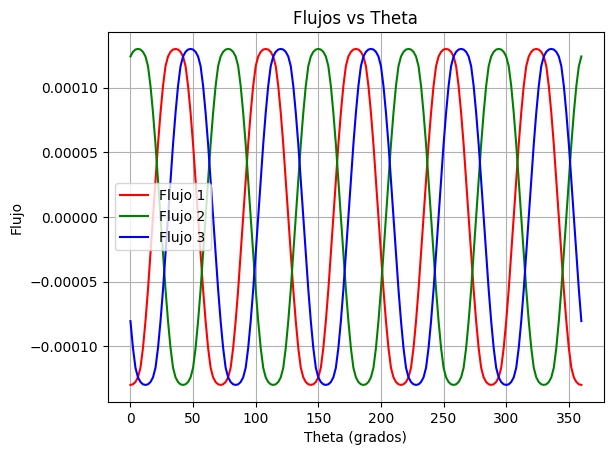

In [91]:


# Plot the fluxes
plt.figure()
plt.plot(Theta, Flujos[0], label='Flujo 1', color='red')
plt.plot(Theta, Flujos[1], label='Flujo 2', color='green')
plt.plot(Theta, Flujos[2], label='Flujo 3', color='blue')
plt.xlabel('Theta (grados)')
plt.ylabel('Flujo')
plt.title('Flujos vs Theta')
plt.legend()
plt.grid(True)
plt.show()
